# Armut 🍐 Association Rule Based Recommender System


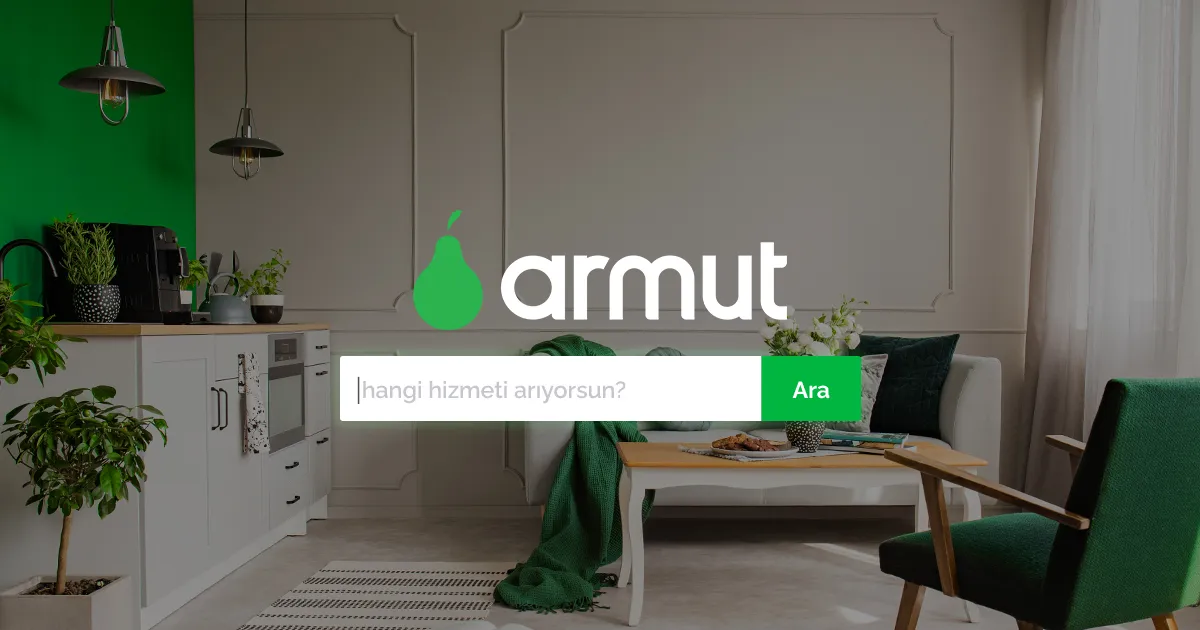

**📊 What is Association Rule Learning (ARL)?**

Association Rule Learning is a machine learning method that finds patterns in data. The Apriori Algorithm helps discover which items are often bought together.

🔹 Support → How often X and Y appear together.

Support(X, Y) = Freq(X, Y) / Total Transaction

🔹 Confidence → The chance of buying Y if X is bought.

Confidence(X, Y) = Freq(X, Y) / Freq(X)

🔹 Lift → How much X increases the chance of buying Y.

Lift = Support(X, Y) / (Support(X) * Support(Y))

These metrics help in sales, marketing, and recommendation systems. 🚀

# Bussines Problem

--- Armut, Turkey's largest online service platform, brings together service providers and those who want to receive service. It provides easy access to services such as cleaning, modification and transportation with a few touches on your computer or smart phone.

**It is desired to create a product recommendation system with Association Rule Learning by using the data set containing the services and categories that the users have purchased.**


# Dataset Story

**The data set consists of the services customers receive and the categories of these services. It contains the date and time information of each service received.**

1- UserId : Customer Id

2- ServiceId : They are anonymized services belonging to each category. (Example: Upholstery washing service under cleaning) A ServiceId can be foundunder different categories and refers to different services under different categories. (Example: Furniture assembly with CategoryId 2 ServiceId 4 during service core cleaning with CategoryId 7 ServiceId 4)	

3- CategoryId : They are anonymized categories. (Example: Cleaning, shipping, as follows)

4- CreateDate : The date the service was purchased

# Libraries

In [1]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 72.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.


In [2]:
# import Required Libraries

import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules

In [3]:
pip install --upgrade ipython ipykernel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 825.5/825.5 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: traitlets
    Found existing installation: traitlets 5.7.1
    Uninstalling traitlets-5.7.1:
      Successfully uninstalled traitlets-5.7.1
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.29.5 which is incompatible.


In [4]:
# Adjusting Row Column Settings

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# TASK 1: Preparing the Data

**Step 1: Read your armut_data.csv file.**

In [5]:
df_ = pd.read_csv ("/kaggle/input/association-rule-learning/armut_data.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
df = df_.copy ()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
df.head ()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserId,ServiceId,CategoryId,CreateDate
0,25446,4,5,2017-08-06 16:11:00
1,22948,48,5,2017-08-06 16:12:00
2,10618,0,8,2017-08-06 16:13:00
3,7256,9,4,2017-08-06 16:14:00
4,25446,48,5,2017-08-06 16:16:00


**Step 2: ServiceID represents a different service for each CategoryID.  Create a new variable to represent these services by combining ServiceID and CategoryID with "_".**

In [8]:
df ["Service"] = df["ServiceId"].astype(str) + "_" + df["CategoryId"].astype(str)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
df.head ()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserId,ServiceId,CategoryId,CreateDate,Service
0,25446,4,5,2017-08-06 16:11:00,4_5
1,22948,48,5,2017-08-06 16:12:00,48_5
2,10618,0,8,2017-08-06 16:13:00,0_8
3,7256,9,4,2017-08-06 16:14:00,9_4
4,25446,48,5,2017-08-06 16:16:00,48_5


**Step 3: The data set consists of the date and time the services were received, there is no basket definition (invoice etc.). In order to apply Association Rule Learning, a basket (invoice, etc.) definition must be created. The basket definition here is the services that each customer receives monthly. For example; 7256 customers with ID received a basket of 9_4, 46_4 services in the 8th month of 2017; The 9_4, 38_4 services received in the 10th month of 2017 refer to another basket. Carts must be identified with a unique ID. To do this, first create a new date variable that contains only the year and month. When you create a new UserID, combine the variable te with "_" and assign it to a new variable named ID.**

In [10]:
df["CreateDate"] = pd.to_datetime(df["CreateDate"])  # Önce datetime formatına çevir
df["New_Date"] = df["CreateDate"].dt.strftime("%Y-%m")  # Sonra yıl-ay formatına çevir
df["BasketID"] = df["UserId"].astype(str) + "_" + df["New_Date"]  # Yeni baketıd  değişken oluştur
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserId,ServiceId,CategoryId,CreateDate,Service,New_Date,BasketID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


**Data preparation function as a bonus**

In [11]:
def armut_data_prep(dataframe):
    dataframe ["Service"] = dataframe["ServiceId"].astype(str) + "_" + dataframe["CategoryId"].astype(str)
    dataframe["CreateDate"] = pd.to_datetime(dataframe["CreateDate"])
    dataframe["New_Date"] = dataframe["CreateDate"].dt.strftime("%Y-%m")
    dataframe["BasketID"] = dataframe["UserId"].astype(str) + "_" + dataframe["New_Date"]
    return dataframe

df = armut_data_prep(df)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,UserId,ServiceId,CategoryId,CreateDate,Service,New_Date,BasketID
0,25446,4,5,2017-08-06 16:11:00,4_5,2017-08,25446_2017-08
1,22948,48,5,2017-08-06 16:12:00,48_5,2017-08,22948_2017-08
2,10618,0,8,2017-08-06 16:13:00,0_8,2017-08,10618_2017-08
3,7256,9,4,2017-08-06 16:14:00,9_4,2017-08,7256_2017-08
4,25446,48,5,2017-08-06 16:16:00,48_5,2017-08,25446_2017-08


# TASK 2: Create Association Rules

**Step 1: Create the cart service pivot table as follows.**

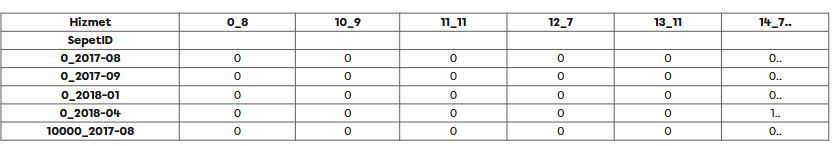

In [12]:
df.groupby(["BasketID", "Service"]).agg({"CategoryId": "count"})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CategoryId
BasketID   Service            
0_2017-08  46_4              1
           48_5              1
0_2017-09  48_5              1
           4_5               1
0_2018-01  30_2              1
...                        ...
99_2018-01 20_5              1
99_2018-02 0_8               1
9_2018-03  25_0              1
9_2018-04  19_6              1
           25_0              1

[121348 rows x 1 columns]

In [13]:
df.groupby(["BasketID", "Service"]).agg({"CategoryId": "count"}).unstack().iloc[0:5, 0:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


CategoryId                      
Service              0_8 10_9 11_11 12_7 13_11
BasketID                                      
0_2017-08            NaN  NaN   NaN  NaN   NaN
0_2017-09            NaN  NaN   NaN  NaN   NaN
0_2018-01            NaN  NaN   NaN  NaN   NaN
0_2018-04            NaN  NaN   NaN  NaN   NaN
10000_2017-08        NaN  NaN   NaN  NaN   NaN

In [14]:
#Boşlukları 0 ile doldur
df.groupby(["BasketID", "Service"]).agg({"CategoryId": "count"}).unstack().fillna(0).iloc[0:5, 0:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CategoryId                      
Service              0_8 10_9 11_11 12_7 13_11
BasketID                                      
0_2017-08            0.0  0.0   0.0  0.0   0.0
0_2017-09            0.0  0.0   0.0  0.0   0.0
0_2018-01            0.0  0.0   0.0  0.0   0.0
0_2018-04            0.0  0.0   0.0  0.0   0.0
10000_2017-08        0.0  0.0   0.0  0.0   0.0

In [15]:
#0dan büyük olanları 1 yap değilse 0 yap
df.groupby(["BasketID", "Service"]). \
    agg({"CategoryId": "count"}). \
    unstack(). \
    fillna(0). \
    applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-15-2994ff05f329>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]


CategoryId                      
Service              0_8 10_9 11_11 12_7 13_11
BasketID                                      
0_2017-08              0    0     0    0     0
0_2017-09              0    0     0    0     0
0_2018-01              0    0     0    0     0
0_2018-04              0    0     0    0     0
10000_2017-08          0    0     0    0     0

In [16]:
#Fonksiyon yazalım

def create_invoice_service_df(df):
    return df.groupby(['BasketID', "Service"])['CategoryId'].count().unstack().fillna(0). \
        applymap(lambda x: 1 if x > 0 else 0)

fr_inv_pro_df = create_invoice_service_df(df)
fr_inv_pro_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-16-22cdb4ef4c4d>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  applymap(lambda x: 1 if x > 0 else 0)


Service,0_8,10_9,11_11,12_7,13_11,14_7,15_1,16_8,17_5,18_4,19_6,1_4,20_5,21_5,22_0,23_10,24_10,25_0,26_7,27_7,28_4,29_0,2_0,30_2,31_6,32_4,33_4,34_6,35_11,36_1,37_0,38_4,39_10,3_5,40_8,41_3,42_1,43_2,44_0,45_6,46_4,47_7,48_5,49_1,4_5,5_11,6_7,7_3,8_5,9_4
BasketID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
0_2017-09,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
0_2018-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
0_2018-04,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
10000_2017-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


**Step 2: Create association rules.**

In [17]:
frequent_itemsets = apriori(fr_inv_pro_df,
                            min_support=0.01,
                            use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [18]:
# Sorted by support value in descending order!
frequent_itemsets.sort_values("support", ascending=False).head (3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
8,0.238121,(18_4)
19,0.130286,(2_0)
5,0.120963,(15_1)


In [19]:
from mlxtend.frequent_patterns import association_rules

# frequent_itemsets daha önce hesaplanmış olmalı
rules = association_rules(frequent_itemsets,
                          metric="support",
                          min_threshold=0.01,
                          num_itemsets=3)  # Burada num_itemsets parametresini ekliyoruz


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
rules[rules["confidence"] > 0.20].sort_values("lift", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
10,(25_0),(22_0),0.042895,0.047515,0.011120,0.259247,5.456141,1.0,0.009082,1.285834,0.853324,0.140251,0.222295,0.246645
11,(22_0),(25_0),0.047515,0.042895,0.011120,0.234043,5.456141,1.0,0.009082,1.249553,0.857462,0.140251,0.199714,0.246645
18,(9_4),(38_4),0.041393,0.066568,0.010067,0.243216,3.653623,1.0,0.007312,1.233418,0.757661,0.102840,0.189245,0.197225
5,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,1.0,0.007929,1.493211,0.725728,0.081967,0.330302,0.252086
12,(22_0),(2_0),0.047515,0.130286,0.016568,0.348700,2.676409,1.0,0.010378,1.335350,0.657611,0.102761,0.251132,0.237934
14,(25_0),(2_0),0.042895,0.130286,0.013437,0.313257,2.404371,1.0,0.007849,1.266432,0.610268,0.084117,0.210380,0.208197
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,1.0,0.018191,1.209066,0.609539,0.156242,0.172915,0.270631
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,1.0,0.018191,1.188833,0.616073,0.156242,0.158839,0.270631
0,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,1.0,0.005442,1.124216,0.449965,0.073635,0.110491,0.162388


In [21]:
rules[rules["confidence"] > 0.20].sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
5,(33_4),(15_1),0.027310,0.120963,0.011233,0.411311,3.400299,1.0,0.007929,1.493211,0.725728,0.081967,0.330302,0.252086
12,(22_0),(2_0),0.047515,0.130286,0.016568,0.348700,2.676409,1.0,0.010378,1.335350,0.657611,0.102761,0.251132,0.237934
14,(25_0),(2_0),0.042895,0.130286,0.013437,0.313257,2.404371,1.0,0.007849,1.266432,0.610268,0.084117,0.210380,0.208197
2,(15_1),(2_0),0.120963,0.130286,0.033951,0.280673,2.154278,1.0,0.018191,1.209066,0.609539,0.156242,0.172915,0.270631
3,(2_0),(15_1),0.130286,0.120963,0.033951,0.260588,2.154278,1.0,0.018191,1.188833,0.616073,0.156242,0.158839,0.270631
10,(25_0),(22_0),0.042895,0.047515,0.011120,0.259247,5.456141,1.0,0.009082,1.285834,0.853324,0.140251,0.222295,0.246645
18,(9_4),(38_4),0.041393,0.066568,0.010067,0.243216,3.653623,1.0,0.007312,1.233418,0.757661,0.102840,0.189245,0.197225
11,(22_0),(25_0),0.047515,0.042895,0.011120,0.234043,5.456141,1.0,0.009082,1.249553,0.857462,0.140251,0.199714,0.246645
0,(13_11),(2_0),0.056627,0.130286,0.012819,0.226382,1.737574,1.0,0.005442,1.124216,0.449965,0.073635,0.110491,0.162388


-support: Possibility of purchasing product X and Y together

-confidence: The probability of purchasing product Y when product X is purchased

-lift: It means that when product X is purchased, the rate of purchasing product Y increases.

**Step 3: Use the arl_recommender function to recommend a service to a user who last received the 2_0 service.**

In [22]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("confidence", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

arl_recommender(rules, "2_0", 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['15_1', '22_0', '25_0', '13_11', '38_4']

In [23]:
def arl_recommender(rules_df, product_id, rec_count=1):
    sorted_rules = rules_df.sort_values("lift", ascending=False)
    recommendation_list = []
    for i, product in enumerate(sorted_rules["antecedents"]):
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

    return recommendation_list[0:rec_count]

arl_recommender(rules, "2_0", 5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['22_0', '25_0', '15_1', '13_11', '38_4']

**Conclusion**

Using Association Rule Learning, we've successfully implemented a recommendation system that suggests services to customers based on their preferences and behaviors. This approach allows us to offer highly relevant and personalized service recommendations, enhancing the overall customer experience.